In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full

%store -r totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full
totaldf = totaldf_full

%store -r scaler

In [2]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,336.150
...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3213.048834,42.548239,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3213.048834,42.548239,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3213.048834,42.548239,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3213.048834,42.548239,365.928


In [3]:
mu1 = (1.084+(X_features[2][:,3]+0.434)*0.114)*totaldf.μob

mu2 = 1.091+0.011*(2*X_features[2][:,3]+0.977)*(X_features[2][:,3] +2.931)+0.011*X_features[2][:,0]*(1.091+0.011*(2*X_features[2][:,3] +0.977)*(X_features[2][:,3]+2.931)-0.915*X_features[2][:,4]+0.977+0.977)
mu2 = mu2*totaldf.μob

mu3 = 1.168-0.126*X_features[2][:,4]/((0.126-X_features[2][:,6])/(-0.842-X_features[2][:,1]*X_features[2][:,2]+X_features[2][:,1])/(-0.842-X_features[2][:,6]*X_features[2][:,2])-1.089)
mu3 = mu3*totaldf.μob

mu4 = 1+0.738*(X_features[2][:,4]+0.277)*0.133 +0.105
mu4 = mu4*totaldf.μob

mu5 = 1.143*0.034*X_features[2][:,3]+0.034*X_features[2][:,4]+(0.034*X_features[2][:,0]+1.143)*0.034*X_features[2][:,3]+1.143
mu5 = mu5*totaldf.μob


In [4]:
br1 = joblib.load("br1.pkl")
br2 = joblib.load("br2.pkl")
br3 = joblib.load("br3.pkl")
br4 = joblib.load('br4.pkl')


In [5]:
totaldf.insert(7,'μ1', mu1)
totaldf.insert(8,'μ2', mu2)
totaldf.insert(9,'μ3', mu3)
totaldf.insert(10,'μ4', mu4)
totaldf.insert(11,'μ5', mu5)



In [6]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,μ1,μ2,μ3,μ4,μ5,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.982766,0.995865,0.992637,0.998995,0.996229,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.002711,1.010193,1.010161,1.016606,1.015411,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.018717,1.022191,1.024021,1.030739,1.030857,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.033510,1.033682,1.036980,1.043802,1.045175,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.047567,1.044960,1.050003,1.056214,1.058818,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3213.048834,42.548239,0.137746,0.137858,0.142647,0.138738,0.139217,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3213.048834,42.548239,0.138549,0.138637,0.143856,0.139482,0.140019,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3213.048834,42.548239,0.139345,0.139414,0.144824,0.140219,0.140815,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3213.048834,42.548239,0.140134,0.140192,0.145604,0.140950,0.141605,365.928


In [7]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(5):
        average_error.append(np.average((a.iloc[:,i+7][a.iloc[:,i+7].notnull().values]-a.μ[a.iloc[:,i+7].notnull().values])/a.μ[a.iloc[:,i+7].notnull().values]*100))
        standard_deviation.append(np.std((a.iloc[:,i+7][a.iloc[:,i+7].notnull().values]-a.μ[a.iloc[:,i+7].notnull().values])/a.μ[a.iloc[:,i+7].notnull().values]*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7][a.iloc[:,i+7].notnull().values]-a.μ[a.iloc[:,i+7].notnull().values])/a.μ[a.iloc[:,i+7].notnull().values]*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7][a.iloc[:,i+7].notnull().values]-a.μ[a.iloc[:,i+7].notnull().values])/a.μ[a.iloc[:,i+7].notnull().values]*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['1','2','3','4','5'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1,-1.438803,5.073840,3.372301,4.054823
2,-1.348967,4.915597,3.200992,3.966920
3,-0.474240,5.895472,3.792031,4.538942
4,-1.452531,5.837928,3.667942,4.768380
5,-0.521022,5.226364,3.352983,4.042753


In [8]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]

Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1,-1.125700,4.329557,2.940874,3.370983
2,-1.098750,4.155336,2.677758,3.362095
3,0.466472,4.358255,3.083540,3.115087
4,-0.367111,4.238978,2.788079,3.214082
5,-0.003079,4.289091,2.890642,3.168674


In [9]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1,-1.117739,5.899783,3.780401,4.665334
2,-1.271539,6.169594,3.934315,4.919540
3,-0.215788,6.605661,4.178505,5.120685
4,-1.337097,6.431886,4.108609,5.126043
5,-0.222605,6.046370,3.713681,4.776684


In [10]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1,-1.393111,5.049289,3.191696,4.153211
2,-1.343181,5.239162,3.480411,4.140011
3,-1.944696,5.985083,3.819840,5.001188
4,-3.329667,5.731631,3.999397,5.286123
5,-1.004965,5.109065,3.197494,4.109565


In [11]:
visc_20_plus = totaldf.loc[(totaldf.μob>20)]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
1,-7.728274,5.938728,7.728274,5.938728
2,-5.334051,4.726275,6.000364,3.845179
3,-11.698894,7.998346,11.698894,7.998346
4,-12.983726,8.261317,12.986910,8.256312
5,-8.325795,6.417605,8.343627,6.394404


In [12]:
def UndersatErrorPlot(a):
    models = ['forest','svm rbf','svm lin poly','ridge']
    b = models.index(a)
    plt.scatter((totaldf.ΔP),(totaldf.iloc[:,b+7]-totaldf.μ)/totaldf.μ*100,facecolors='none', edgecolors='b')
    plt.title(f'Undersaturated Oil Viscosity \n {a}')
    plt.xlabel('Presure-Bubble point pressure(Psia)')
    plt.ylabel('% Error')



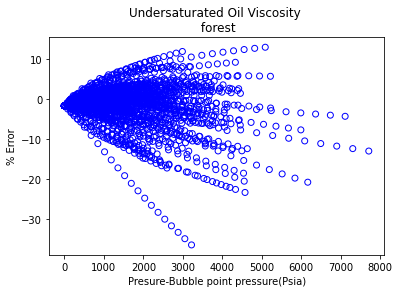

In [13]:
UndersatErrorPlot('forest')


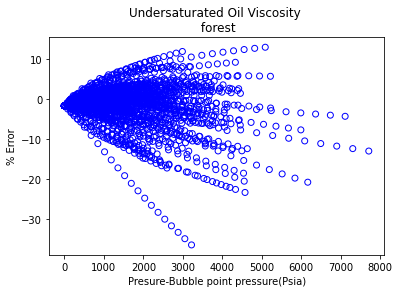

In [14]:
UndersatErrorPlot('forest')

KeyError: 'forest μ'

Text(0, 0.5, '% Average Absolute Error')

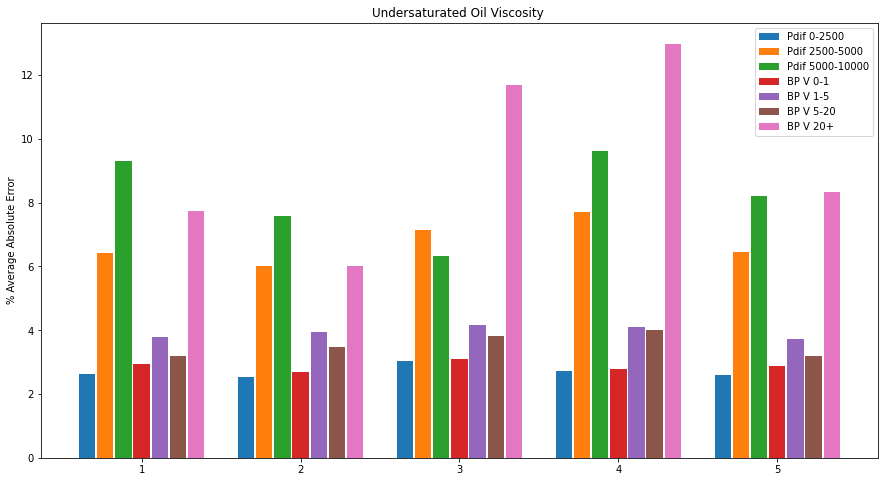

In [17]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}   
models =   ['1','2','3','4','5']

%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(5), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")
   